### Read the data into the Datafile

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from langdetect import detect 

In [4]:
df = pd.read_excel ('synthetic_data_created.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


### Check shape, info and statistical summary of the data

In [5]:
df.shape

(8500, 4)

##### Datafile has 8500 records and 4 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


##### Datafile has 4 Columns,  all Object type

In [5]:
df.isna().apply(pd.value_counts)   #Missing value check

,Short description,Description,Caller,Assignment group
False,8492,8499,8500.0,8500.0
True,8,1,NaN,NaN


##### There are 8 null values in short description column and 1 in description column.

In [6]:
df.describe().T

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


#### Checking for non English Languages 

In [7]:
df['Short description lang'] = ""
df['Description lang'] = ""
for (idx, row) in df.iterrows():
    try:
        row.loc['Short description lang'] = detect(row.loc['Short description'])
        row.loc['Description lang'] = detect(row.loc['Description'])
    except Exception as e:
        pass

#### Visualizing the data

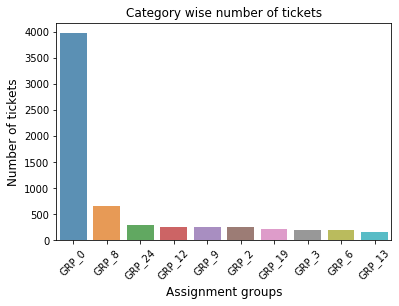

In [8]:
# Plotting top 10 group wise count of tickets
group_count = df['Assignment group'].value_counts()
sns.barplot(group_count.index[:10], group_count.values[:10], alpha=0.8)
plt.title('Category wise number of tickets')
plt.ylabel('Number of tickets', fontsize=12)
plt.xlabel('Assignment groups', fontsize=12,)
plt.xticks(rotation=45)
plt.show()

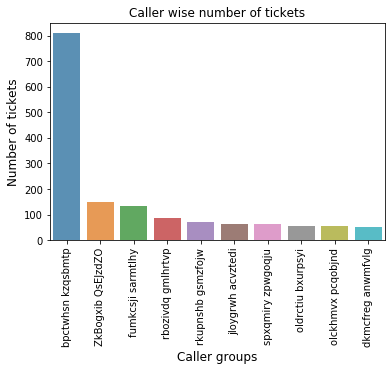

In [9]:
# Plotting top 10 caller wise count of tickets
group_count = df['Caller'].value_counts()
sns.barplot(group_count.index[:10], group_count.values[:10], alpha=0.8)
plt.title('Caller wise number of tickets')
plt.ylabel('Number of tickets', fontsize=12)
plt.xlabel('Caller groups', fontsize=12,)
plt.xticks(rotation='vertical')
plt.show()

 One caller has raised maximum number of tickets, this can be Service Desk personal.

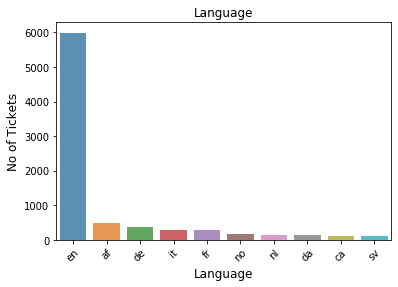

In [10]:
#Plot for top 10 launguage for Short Description
group_count = df['Short description lang'].value_counts()
sns.barplot(group_count.index[:10], group_count.values[:10], alpha=0.8)
plt.title('Language')
plt.ylabel('No of Tickets', fontsize=12)
plt.xlabel('Language', fontsize=12,)
plt.xticks(rotation=45)
plt.show()

English language has maximum number of tickets.

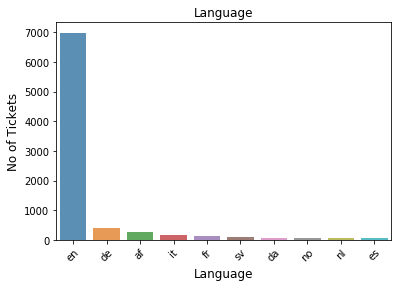

In [11]:
#Plot for top 10 launguage for Description
group_count = df['Description lang'].value_counts()
sns.barplot(group_count.index[:10], group_count.values[:10], alpha=0.8)
plt.title('Language')
plt.ylabel('No of Tickets', fontsize=12)
plt.xlabel('Language', fontsize=12,)
plt.xticks(rotation=45)
plt.show()

In [13]:
df_grp = df.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

,Assignment group,counts
0,GRP_0,3976
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,661


In [14]:
df_grp.describe()

,counts
count,74.000000
mean,114.864865
std,465.747516
min,1.000000
25%,5.250000
50%,26.000000
75%,84.000000
max,3976.000000


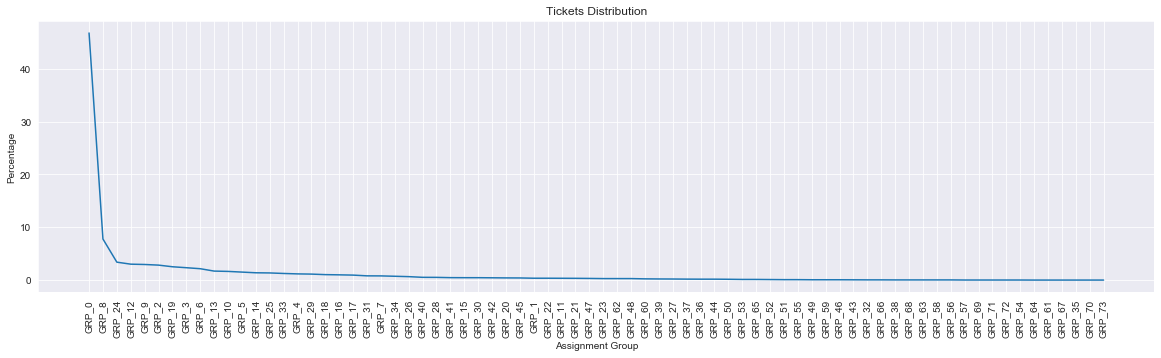

In [19]:
import seaborn as sns
sns.set_style("darkgrid")

## distibution based on Percentage
df_grp["count_perc"] = round((df_grp["counts"]/df.shape[0])*100,2)
df_grp.sort_values(["count_perc"], axis=0, 
                 ascending=False, inplace=True) 


## View the Distribution of all Records
plt.subplots(figsize = (20,5))
 
plt.plot(df_grp["Assignment group"], df_grp["count_perc"]) 
plt.xlabel('Assignment Group') 
plt.ylabel('Percentage') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')
plt.show()

There are 74 Assignment Groups.The above shows number of tickets in each group. Group 0 has maximum tickets 3976 followed by Group 8,24,12 and so on.                                                                                                       

##### Word Clouds for Short description and Description  columns.

Text(0.5, 1.0, 'Word cloud for Short Description')

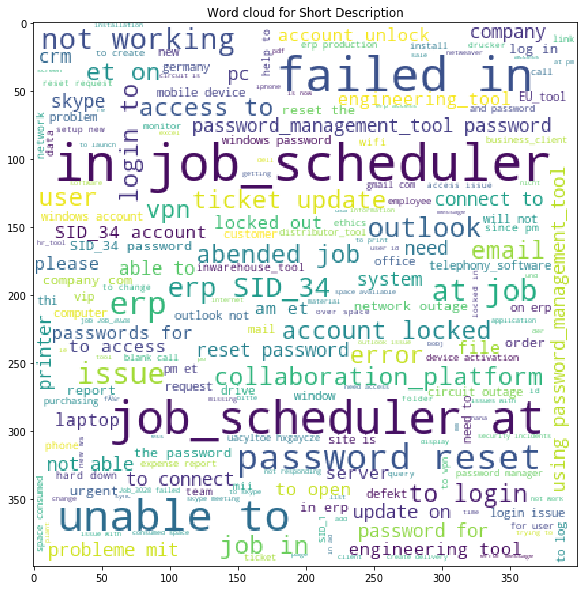

In [9]:
from wordcloud import WordCloud
desc = " ".join(str(des) for des in df['Short description'])

wc_desc = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_desc)
plt.title("Word cloud for Short Description")

Text(0.5, 1.0, 'Word cloud for Description')

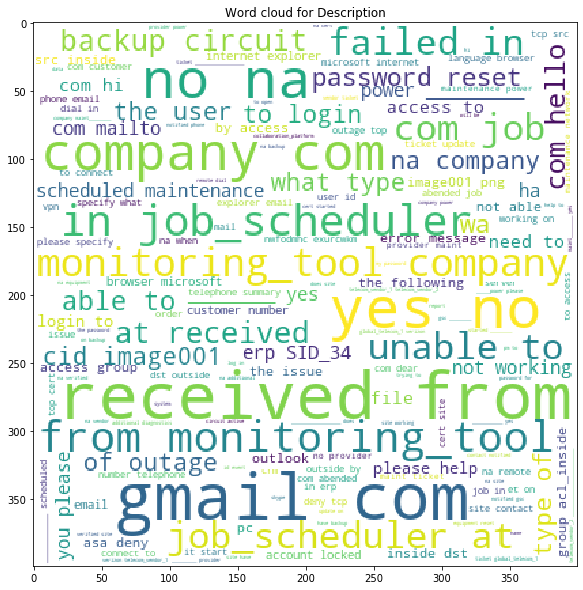

In [10]:
desc = " ".join(str(des) for des in df['Description'])

wc_desc = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_desc)
plt.title("Word cloud for Description")

#### Separating the data which contains only english as a language

In [19]:
options = ['en']
df_new = df[df['Short description lang'].isin(options) & df['Description lang'].isin(options)]

### Sepating the groups having only one ticket

In [25]:
vc = df_new['Assignment group'].value_counts()
len(vc)

72

In [26]:
#Assignment groups contributing to the data
pd.set_option('display.max_rows', None)
vc.nlargest(72)

GRP_0     2478
GRP_8      604
GRP_9      208
GRP_12     197
GRP_2      196
GRP_3      169
GRP_19     137
GRP_6      132
GRP_5      117
GRP_10     115
GRP_13     110
GRP_14      98
GRP_4       94
GRP_25      79
GRP_16      73
GRP_7       66
GRP_29      63
GRP_18      62
GRP_24      58
GRP_17      57
GRP_26      43
GRP_40      38
GRP_34      36
GRP_41      33
GRP_20      32
GRP_28      29
GRP_15      27
GRP_22      27
GRP_45      26
GRP_1       26
GRP_23      24
GRP_47      23
GRP_21      23
GRP_33      21
GRP_11      21
GRP_39      17
GRP_31      16
GRP_60      16
GRP_37      14
GRP_36      13
GRP_27      11
GRP_53      11
GRP_44       8
GRP_51       8
GRP_50       8
GRP_65       8
GRP_62       6
GRP_52       6
GRP_43       5
GRP_59       5
GRP_55       4
GRP_66       4
GRP_38       3
GRP_46       3
GRP_58       3
GRP_49       3
GRP_56       3
GRP_42       3
GRP_71       2
GRP_30       2
GRP_32       2
GRP_69       2
GRP_63       2
GRP_57       2
GRP_54       2
GRP_73       1
GRP_72    

#### There are 7 groups having only one ticket
['GRP_64','GRP_73','GRP_61','GRP_48','GRP_35','GRP_68','GRP_72']

In [27]:
group_list = ['GRP_64','GRP_73','GRP_61','GRP_48','GRP_35','GRP_68','GRP_72']

In [28]:
df_other = df_new[df_new['Assignment group'].isin(group_list)]
df2 = df_new[~df_new['Assignment group'].isin(group_list)]

In [29]:
df2.shape

(5734, 6)

In [30]:
df_other.shape


(7, 6)

#### Combining the 7 groups into one

In [31]:
df_other['Assignment group']='GRP_others'

C:\Users\abhijeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
frames = [df2,df_other]
df_more_grp = pd.concat(frames)

In [33]:
df_more_grp.shape

(5741, 6)

In [34]:
len(df_more_grp['Assignment group'].value_counts())

66

In [ ]:
# Saving it as a csv file
df_more_grp.to_csv("input_data_eng.csv",index=False)

In [43]:
df = pd.read_csv("input_data_eng.csv")
df.shape

(5741, 6)

In [44]:
len(df['Assignment group'].value_counts())

66

In [4]:
df.head()

,Short description,Description,Caller,Assignment group,Short description lang,Description lang
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,en
1,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,en,en
2,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,en
3,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en,en
4,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,en,en


### Preprocessing pipeline

We have identified the following steps of preprocessing for the given dataset:
1. Changing the data to lower case
2. Removing any email ids in the data
3. Remove all numbers from the data.
4. Remove any URL or web address
5. Remove all the special characters in the text
6. Remove all accented characters
7. Expanding contractions
8. Remove "received from" text from the data
9. Remove "SID_ " text from the data
10. Remove username/caller name from the data
11. Removing the stop words
12. Lemmetization


 
* We have chain all these operations together and build a text preprocessing API.


In [5]:
from Text_Preprocessing import text_preprocessing

In [12]:
EMAIL_FLAG=True
DIGIT_FLAG=True
HYPER_LINK_FLAG=True
SPECIAL_CHAR_VALIDATE_FLAG=False
SPEC_CHAR_COUNT=0
ALL_SPEC_CHAR_FLAG=True
ACCENT_CHAR_FLAG=True
RECEIVED_FROM_FLAG=True
USER_NAME_FLAG=True
LOWER_CASE_FLAG=True
CONTRACTION_EXPAND_FLAG=True
REMOVE_NON_ENGLISH=False
LEMMETIZE_FLAG=True
STOPWORD_FLAG=True
Word_list = ['to','me','my']
IS_SID_FLAG=False


#Passing the short description column through preprocessing api


clean_data_short_desc = text_preprocessing(df['Short description'],EMAIL_FLAG,DIGIT_FLAG,HYPER_LINK_FLAG,SPECIAL_CHAR_VALIDATE_FLAG, 
                             SPEC_CHAR_COUNT,ALL_SPEC_CHAR_FLAG,ACCENT_CHAR_FLAG, 
                             RECEIVED_FROM_FLAG,USER_NAME_FLAG,LOWER_CASE_FLAG,CONTRACTION_EXPAND_FLAG,
                             REMOVE_NON_ENGLISH,LEMMETIZE_FLAG,STOPWORD_FLAG,Word_list,IS_SID_FLAG,df['Caller'])

clean_data_desc = text_preprocessing(df['Description'],EMAIL_FLAG,DIGIT_FLAG,HYPER_LINK_FLAG,SPECIAL_CHAR_VALIDATE_FLAG, 
                             SPEC_CHAR_COUNT,ALL_SPEC_CHAR_FLAG,ACCENT_CHAR_FLAG, 
                             RECEIVED_FROM_FLAG,USER_NAME_FLAG,LOWER_CASE_FLAG,CONTRACTION_EXPAND_FLAG,
                             REMOVE_NON_ENGLISH,LEMMETIZE_FLAG,STOPWORD_FLAG,Word_list,IS_SID_FLAG,df['Caller'])

* Advanced Preprocessing Steps Included are -

* Digits with _ are not removed (as it has been analyzed that digits associated  with JOB_,Host_ are important for classifiyng tickets into repective groups)

In [14]:
df_clean = df.copy()

In [15]:
len(clean_data_short_desc)
len(clean_data_desc)

5741

In [16]:
df_clean['clean_Short_desc']=clean_data_short_desc
df_clean['clean_Description']=clean_data_desc

In [35]:
pd.set_option('display.max_colwidth', -1)
df_clean[['Description','clean_Description']][50:60]

,Description,clean_Description
50,received from: monitoring_tool@company.com\r\n\r\njob Job_1338 failed in job_scheduler at: 10/31/2016 02:29:00,receive job job_1338 fail job_scheduler
51,received from: monitoring_tool@company.com\r\n\r\njob Job_1854 failed in job_scheduler at: 10/31/2016 01:36:00,receive job job_1854 fail job_scheduler
52,received from: monitoring_tool@company.com\r\n\r\njob Job_2588 failed in job_scheduler at: 10/31/2016 01:30:00,receive job job_2588 fail job_scheduler
53,received from: monitoring_tool@company.com\r\n\r\njob Job_2599 failed in job_scheduler at: 10/31/2016 01:30:00,receive job job_2599 fail job_scheduler
54,"\n\nreceived from: przndfbo.pldqbhtn@gmail.com\n\nit team,\n\nplease kindly release locked computer for user : xyz\nuser name : fbmugzrl ahyiuqev\n\n",receive team kindly release lock computer xyz fbmugzrl ahyiuqev
55,my laptop speakers is not working again and requires your urgent help.,my laptop speaker work require urgent
56,user needs help to connect to the wireless connection at home.\n-had the user connect to the lan at home.\n-connected to the user system using teamviewer.\n-checked the network settings.\n-help the user login to the home wireless.\n-disconnected the home lan.\n-user confirmed that he is able to login to the home wireless.\n-issue resolved.,to connect to wireless connection home connect to lan home connect to system use teamviewer check network setting login to home wireless disconnect home lan confirm able to login to home wireless issue resolve
57,inc1564062: ticket update,inc1564062 ticket update
58,received from: monitoring_tool@company.com\r\n\r\njob hr_payroll_na_u1 failed in job_scheduler at: 10/30/2016 23:00:00,receive job hr_payroll_na_u1 fail job_scheduler
59,received from: monitoring_tool@company.com\r\n\r\njob hr_payroll_na_u2 failed in job_scheduler at: 10/30/2016 23:00:00,receive job hr_payroll_na_u2 fail job_scheduler


In [20]:
len(df_clean['Assignment group'].value_counts())

66

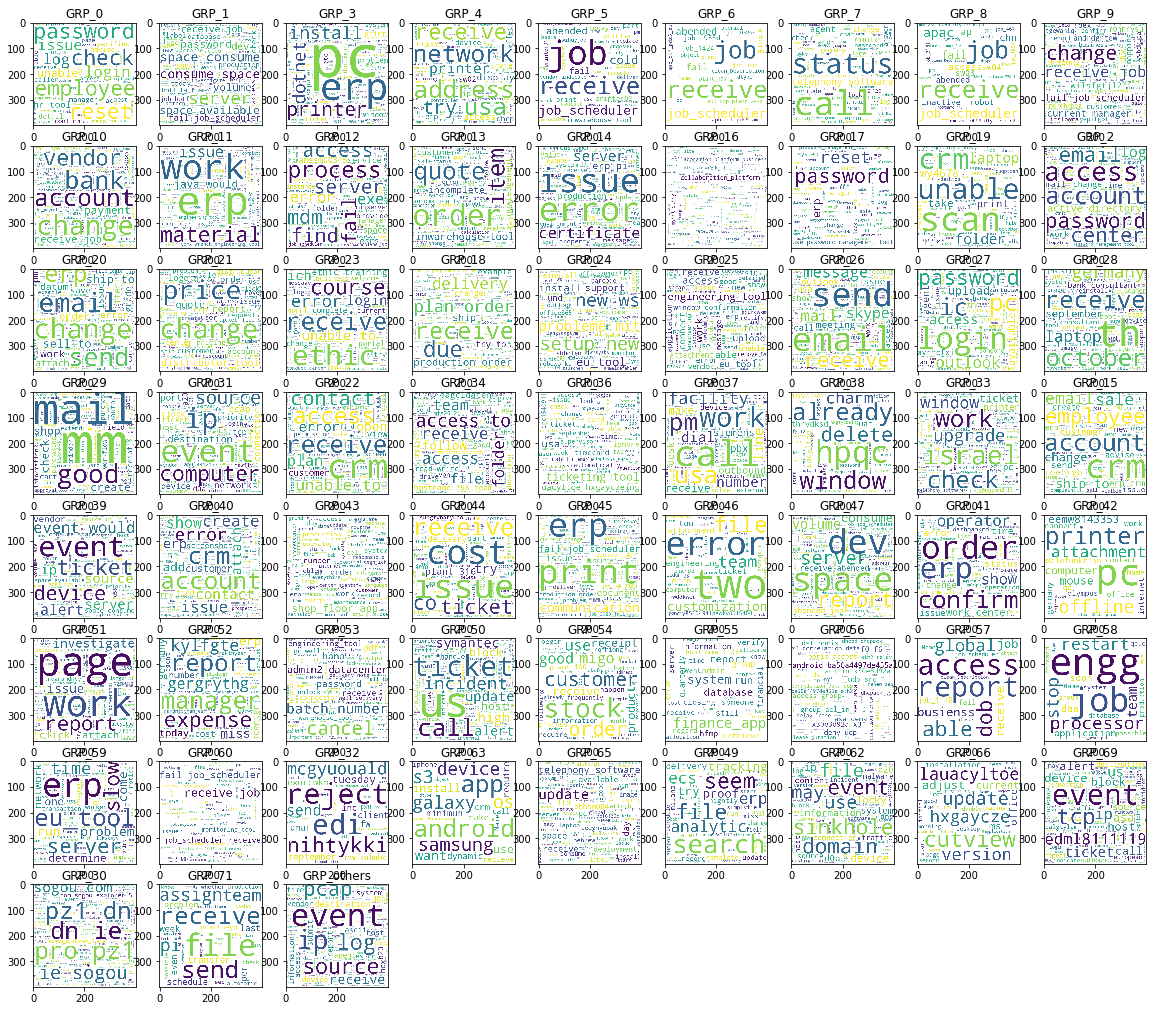

In [23]:
#Description
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

for index, i in enumerate(df_clean['Assignment group'].unique()):
  s = str(i)
  i = str(df_clean[df_clean['Assignment group']==s].clean_Description)
  i = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(i)
  c = index+1
  plt.subplot(10,5,c)
  plt.imshow(i)
  plt.title(s)


In [24]:
df_clean.to_csv('clean_data_capstoneV4.csv',columns=['clean_Short_desc','clean_Description','Assignment group'],index=False)

In [26]:
df_new = pd.read_csv("clean_data_capstoneV4.csv")
df_new.shape

(5741, 3)

In [28]:
df_new.isnull().sum()

clean_Short_desc     3 
clean_Description    39
Assignment group     0 
dtype: int64

In [29]:
df_new.dropna(inplace=True)

In [30]:
df_new.to_csv("clean_data_capstoneV4.csv",index=False)

In [31]:
df_new1= pd.read_csv('clean_data_capstoneV4.csv')
df_new1.isnull().sum()

clean_Short_desc     0
clean_Description    0
Assignment group     0
dtype: int64

In [32]:
len(df_new1['Assignment group'].value_counts())

66

#### Imbalnce Dataset 

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.
However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

### Word cloud after cleaning the data

Text(0.5, 1.0, 'Word cloud for Short Description')

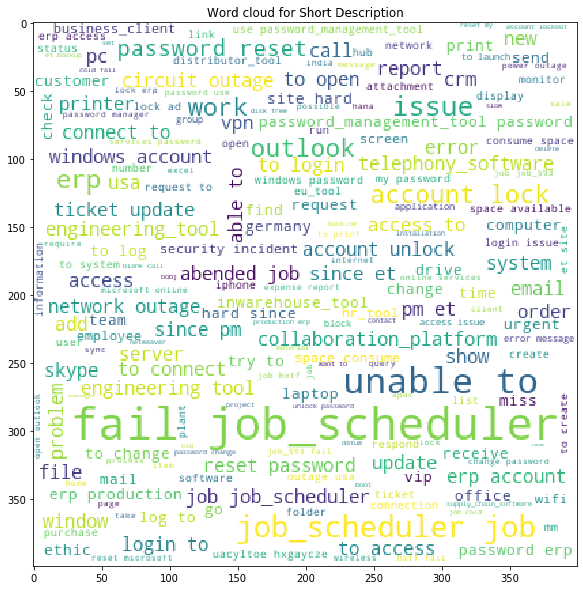

In [12]:

desc = " ".join(str(des) for des in df['Short description'])

wc_desc = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_desc)
plt.title("Word cloud for Short Description")

Text(0.5, 1.0, 'Word cloud for Description')

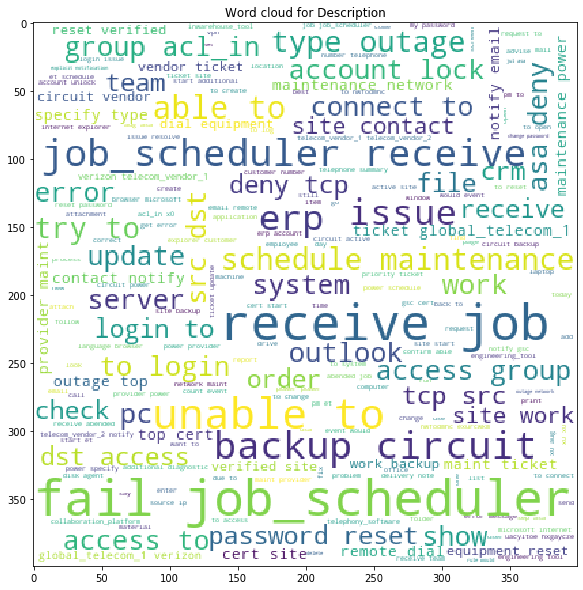

In [13]:
desc = " ".join(str(des) for des in df['Description'])

wc_desc = WordCloud(background_color='white', max_words=200, width=400, height=400,random_state=10).generate(desc)
plt.figure(figsize=(10,10))
plt.imshow(wc_desc)
plt.title("Word cloud for Description")